In [14]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.3/10.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.9 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/10.9 MB 1.6 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/10.9 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/10.9 MB 1.9 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/10.9 MB 1.7 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/10.9 MB 1.7 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/10.9 MB 1.7 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/10.9 MB 1.7 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/10.9 MB 1.7 MB/s eta 0:00:05
   --------------- ------------------------ 4.2/10.9 MB 1.7 MB/s eta 0:00:05
   ---------------- 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno
from fast_ml.feature_selection import get_duplicate_features

In [16]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [24]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


# Missing Value

In [25]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(train):
        # Total missing values
        mis_val = train.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [26]:
missing_values_table(data)

Your selected dataframe has 19 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Type_Occupation,488,31.5
Annual_income,23,1.5
Birthday_count,22,1.4
GENDER,7,0.5


<Axes: >

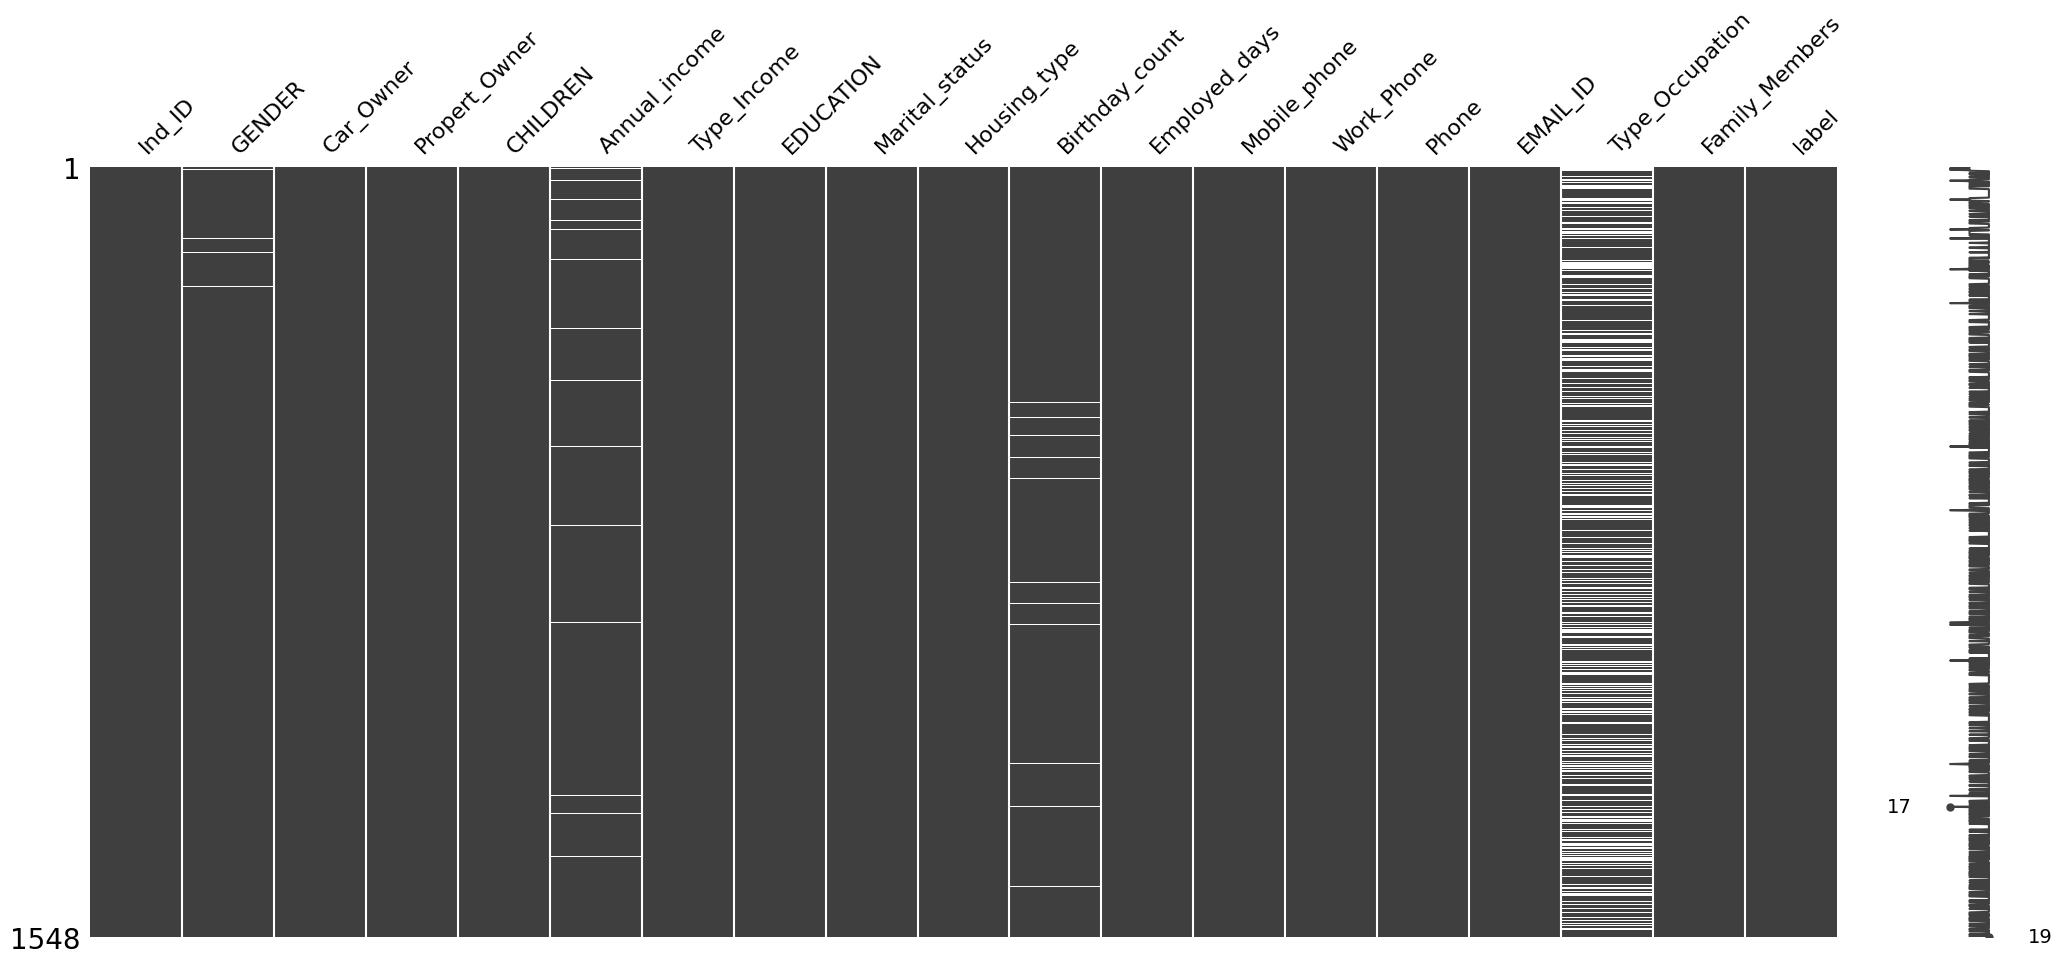

In [27]:
mno.matrix(data)

In [30]:
# Cek apakah ada row data duplikat
int(data.duplicated().sum())

0

In [21]:
# mendapatkan kolom-kolom dengan duplikasi values
duplicate_features = get_duplicate_features(data)
print('Duplikasi kolom:\n')
print(duplicate_features)

Duplikasi kolom:

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []


# Visualisasi

In [31]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [32]:
# Ubah tipe Mobile_phone, Work_phone, Phone, Email, dan label menjadi kategori
data['Mobile_phone'] = data['Mobile_phone'].astype('category')
data['Work_Phone'] = data['Work_Phone'].astype('category')
data['Phone'] = data['Phone'].astype('category')
data['EMAIL_ID'] = data['EMAIL_ID'].astype('category')
data['label'] = data['label'].astype('category')

In [33]:
# Ambil fitur numerik dan kategorik
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

## Barchart

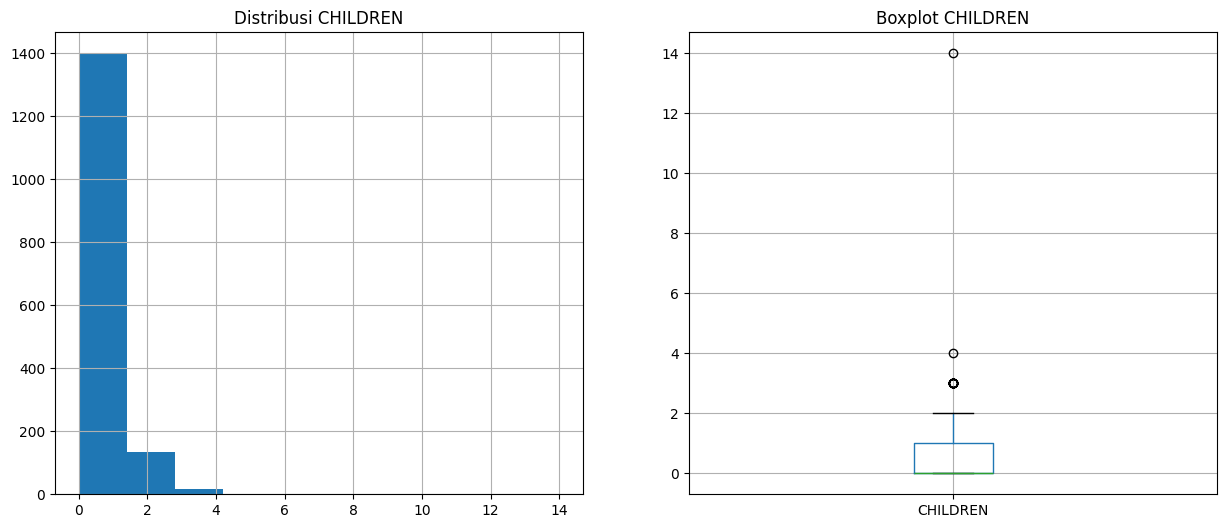

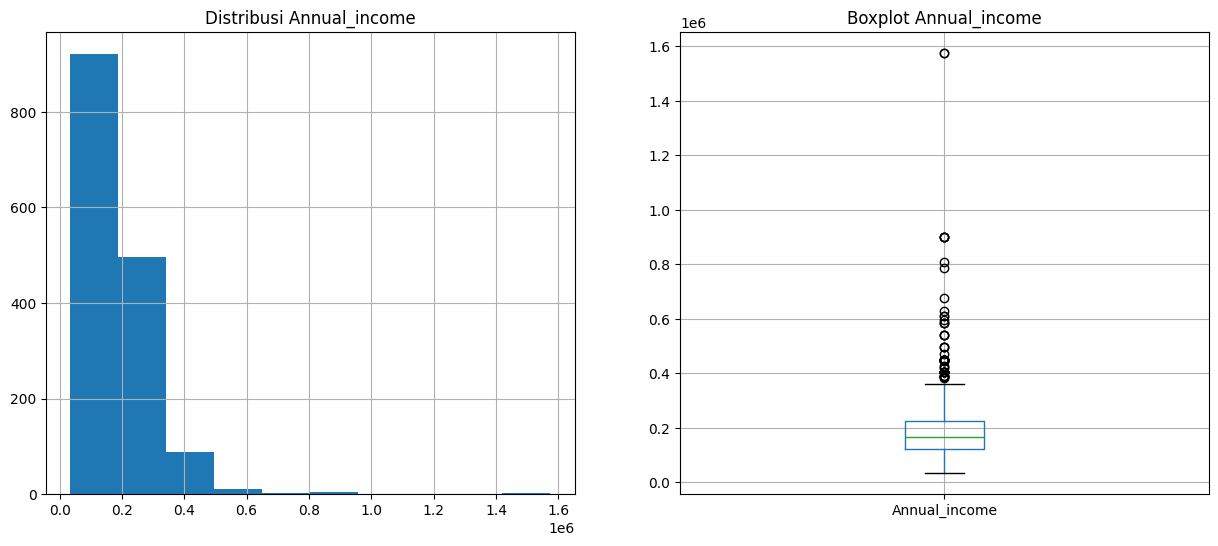

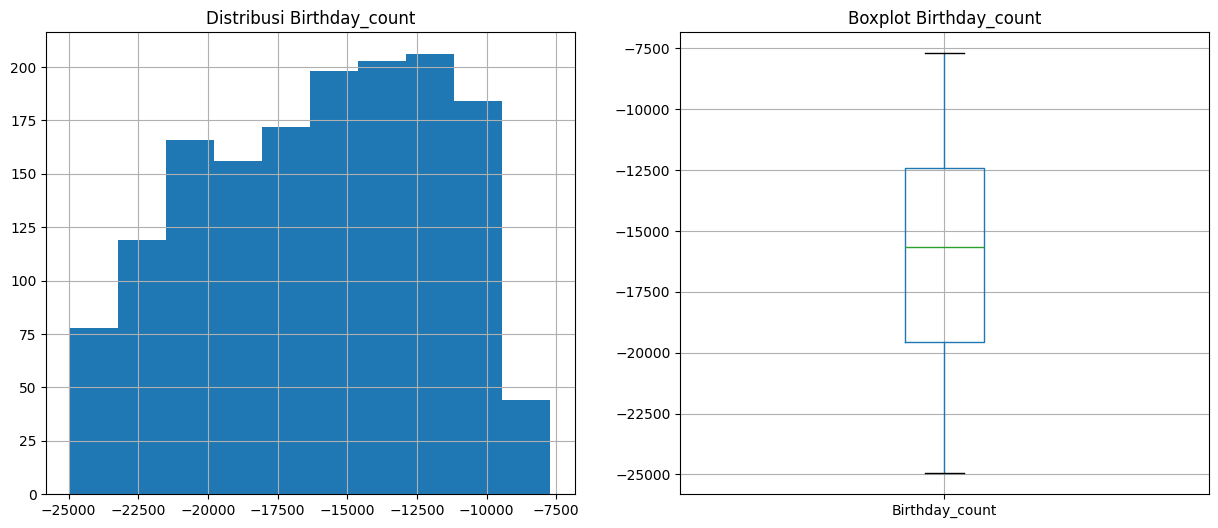

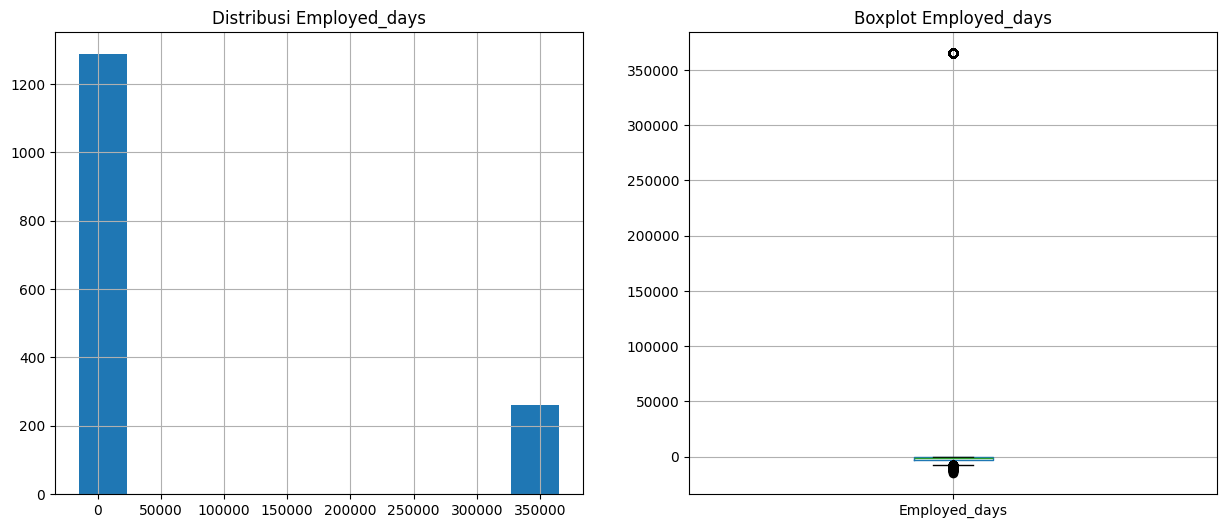

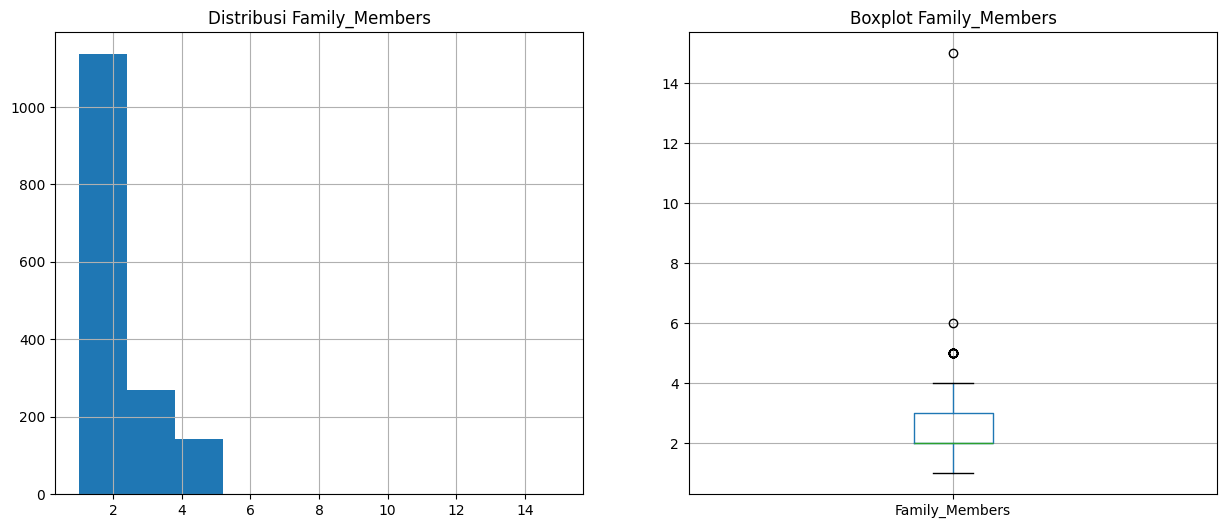

In [34]:
# Visualisasi distribusi data numerik dan boxplotnya yang hasilnya jejeran.
for feature in numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[feature].hist()
    plt.title('Distribusi ' + feature)
    plt.subplot(1, 2, 2)
    data.boxplot(column=feature)
    plt.title('Boxplot ' + feature)
    plt.show()